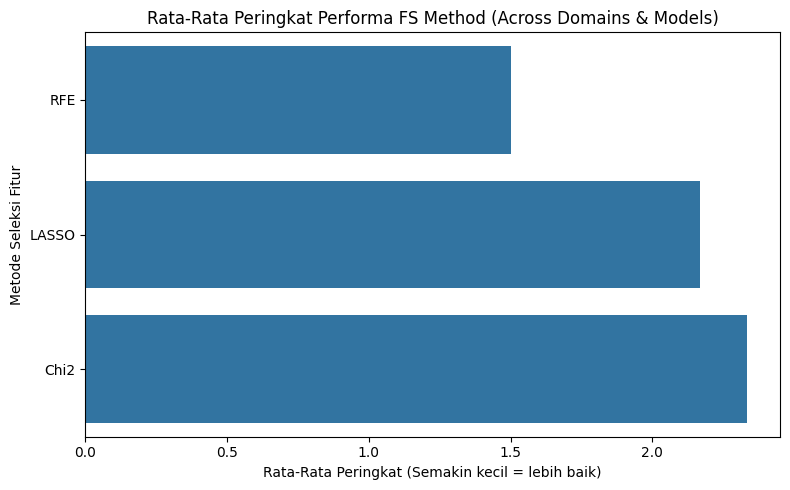

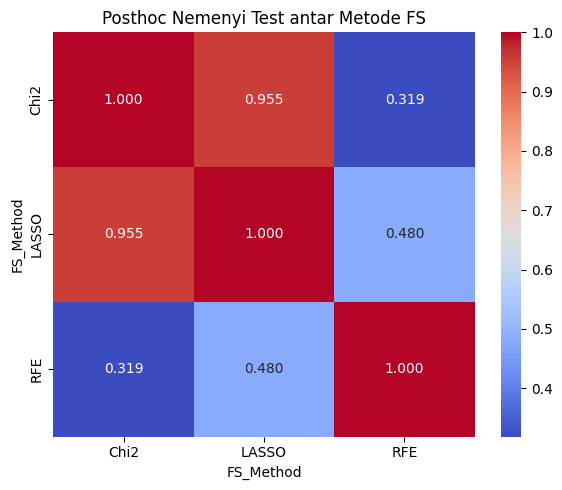

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikit_posthocs as sp
from scipy.stats import friedmanchisquare, rankdata

# Load data evaluasi sebelumnya
df = pd.read_csv("fs_evaluation_3domain_full.csv")

# --- 1. Siapkan pivot matrix F1_macro untuk Friedman & Nemenyi ---
pivot_data = df.pivot_table(index=["Domain", "Model"], columns="FS_Method", values="F1_macro")

# --- 2. Friedman Test Global (Across Domain x Model) ---
friedman_stat, friedman_p = friedmanchisquare(*[pivot_data[col].dropna() for col in pivot_data.columns])

# --- 3. Nemenyi Test ---
nemenyi_result = sp.posthoc_nemenyi_friedman(pivot_data.values)
nemenyi_result.columns = pivot_data.columns
nemenyi_result.index = pivot_data.columns

# --- 4. Ranking Rata-rata per FS Method ---
avg_rank = pivot_data.rank(ascending=False, axis=1).mean().sort_values()

# --- 5. Visualisasi Rata-Rata Peringkat ---
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_rank.values, y=avg_rank.index, orient="h")
plt.xlabel("Rata-Rata Peringkat (Semakin kecil = lebih baik)")
plt.ylabel("Metode Seleksi Fitur")
plt.title("Rata-Rata Peringkat Performa FS Method (Across Domains & Models)")
plt.tight_layout()
plt.show()

# --- 6. Heatmap Hasil Nemenyi Test ---
plt.figure(figsize=(6, 5))
sns.heatmap(nemenyi_result, annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Posthoc Nemenyi Test antar Metode FS")
plt.tight_layout()
plt.show()

# --- 7. Simpan Statistik untuk Pembahasan ---
stats_summary = pd.DataFrame({
    "FS_Method": avg_rank.index,
    "Avg_Rank": avg_rank.values,
    "Friedman_pvalue": friedman_p
})



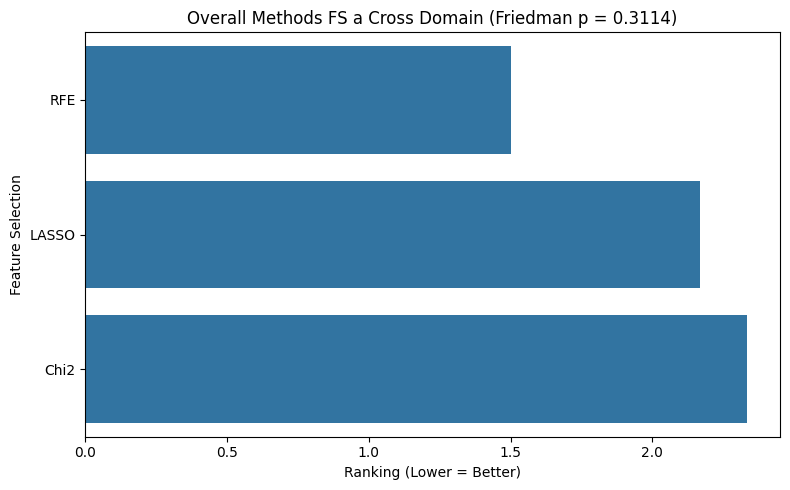

In [3]:
# Pivot matrix untuk skor F1 macro per kombinasi domain-model
pivot_data = df.pivot_table(index=["Domain", "Model"], columns="FS_Method", values="F1_macro")

# Friedman test global
friedman_stat, friedman_p = friedmanchisquare(*[pivot_data[method] for method in pivot_data.columns])

# Visualisasi ranking (semakin kecil lebih baik)
ranks = pivot_data.rank(axis=1, ascending=False)
avg_ranks = ranks.mean().sort_values()

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_ranks.values, y=avg_ranks.index, orient="h")
plt.xlabel("Ranking (Lower = Better)")
plt.ylabel("Feature Selection")
plt.title(f"Overall Methods FS a Cross Domain (Friedman p = {friedman_p:.4f})")
plt.tight_layout()
plt.show()